In [49]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
data = pd.read_csv("../data/Self-Introduction(Cleaned).csv", index_col="ALIAS")
data.head()

,"If you are studying at a university other than KTH, which is it?",In what year did you start your university degree ?,What year and month you expect to graduate?,MAJOR,What degree are you pursuing?,"Please, tell me about yourself. What interest you? Do you have any hobbies?",What do you expect to learn in Information Visualization? How do expect to use what you learn?,"What courses have you completed that are relevant to Information Visualization, where and when?",Do you use KTH Canvas?,viz,...,ui,code,graph,hci,eval,comm,collab,GIT,"If you are working towards a master's degree, what is the status of your thesis? You:",Where do you want to be in 5 years?
ALIAS,,,,,,,,,,,,,,,,,,,,,
ramranch,KTH,2019,06/2025,Computer Science,Master in Science,My main hobbies include art (drawing) and game...,"Honestly I am not too sure what I will learn, ...",I haven't really completed any course that is ...,Sometimes,3.0,...,8.0,5.0,5.0,6.0,4.0,1.0,1.0,5.0,Have not started planning for it.,"Genuinely no idea, I thought about perhaps joi..."
Caterpillar Fungus,KTH,2023,12/2025,Media Technology,Master in Science,I am putting myself in an uncomfortable positi...,"I am interested in maps, so I would like to cr...",I am not sure if I have taken any courses rela...,Sometimes,3.0,...,8.0,4.0,3.0,4.0,3.0,6.0,8.0,8.0,Have not started planning for it.,Consultant
tjsol,KTH,2023,06/2025,Human-Computer Interaction,Master in Science,Web Development,I'd like to use my learnings in a professional...,"Web Development, during my bachelor.",Often,5.0,...,9.0,7.0,2.0,3.0,6.0,4.0,6.0,10.0,Have not started planning for it.,Software Engineer
Rookie9,KTH,2018,06/2025,Computer Science,Master in Science,No answer,How to effectively represent and analyze data ...,"Data Visuliazation. In 2022 in China, Shanghai...",Often,5.0,...,6.0,5.0,4.0,5.0,5.0,5.0,7.0,4.0,Have not started planning for it.,Two possible ways. One is pursuing another mas...
matcha,HKUST (Hong Kong),2021,06/2025,Chemical Engineering + Ai,Bachelor in Engineering,Hello! I'm interested in learning how to incor...,I want to learn information visualization to b...,"In my home university, I took courses in data ...",Sometimes,3.0,...,5.0,3.0,2.0,3.0,3.0,8.0,8.0,3.0,Not working towards a master's degree,No answer


In [50]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package movie_review

True

In [51]:
lemmatizer = nltk.stem.WordNetLemmatizer()


In [52]:
hobbies = (data.loc[:, "Please, tell me about yourself. What interest you? Do you have any hobbies?"]
           .str.lower()
           .str.strip()
           .replace("no answer", "NA")
           .replace("[^\w\s]", " ", regex=True)
           .apply(lambda x: x.replace("working out", "workout"))
           .apply(nltk.tokenize.word_tokenize)
           .apply(lambda x: [lemmatizer.lemmatize(i) if not i.endswith("ing") else lemmatizer.lemmatize(i, "v") for i in x])
           .apply(set)
           )
hobbies

ALIAS
ramranch              {development, me, anxiety, am, way, period, a,...
Caterpillar Fungus    {graduate, 2025, uncomfortable, forced, progra...
tjsol                                                {development, web}
Rookie9                                                            {NA}
matcha                {m, incorporate, crochet, interested, to, my, ...
Flower                {new, interested, am, knowledge, hike, and, i,...
kapybara              {development, work, front, to, my, web, and, p...
Bebocchia                                          {a, part, of, choir}
stellarise             {animation, game, sport, especially, technology}
Kakka                                                              {NA}
Beowulf               {art, creative, movie, game, cook, and, progra...
BirdMaster            {theatre, game, read, student, activity, exerc...
SargeSmoke            {development, video, art, volleyball, intellig...
Weissach              {m, especially, car, to, 1, vehicle,

In [53]:
stopwords = set(nltk.corpus.stopwords.words("english")) | {"include", "hobby", "like", "NA", "interested", "im", "would", "especially", "also", "bit", "main", "way", "end", "time", "want", "many", "mainly", "enjoy", "play", "including", "love"
                                                           , "interest", "current", "etc", "thing", "specifically", "major", "lot", "take", "use", "mine", "part", "video", "year", "good"} 
stopwords

{'NA',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bit',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'current',
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'end',
 'enjoy',
 'especially',
 'etc',
 'few',
 'for',
 'from',
 'further',
 'good',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'hobby',
 'how',
 'i',
 'if',
 'im',
 'in',
 'include',
 'including',
 'interest',
 'interested',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'like',
 'll',
 'lot',
 'love',
 'm',
 'ma',
 'main',
 'mainly',
 'major',
 'many',
 'me',
 'mightn',
 "mightn't",
 'mine',
 '

In [54]:
commonWords = pd.DataFrame([[hobbies.loc[i] & hobbies.loc[j] - stopwords if i!=j else set() for i in data.index] for j in data.index], index=data.index, columns=data.index)
commonWords

ALIAS,ramranch,Caterpillar Fungus,tjsol,Rookie9,matcha,Flower,kapybara,Bebocchia,stellarise,Kakka,...,Sam Vimes,Frieren,DiscoTechLola,Aaron,GGer,Reisen,DrPavel,SannyKuro,Mintchoco,Ty29
ALIAS,,,,,,,,,,,,,,,,,,,,,
ramranch,{},"{game, computer}",{development},{},{},{art},{development},{},{game},{},...,{},{},{},{},{},{},{game},{},{game},{}
Caterpillar Fungus,"{game, computer}",{},{},{},{learn},"{travel, learn}",{},{},{game},{},...,{},{travel},{},{football},{},{},{game},{},"{travel, game}",{cycle}
tjsol,{development},{},{},{},{},{},"{development, web}",{},{},{},...,{},{},{},{},{},{},{},{},{},{}
Rookie9,{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{}
matcha,{},{learn},{},{},{},{learn},{sport},{},{sport},{},...,{},{},{},{},{},{},{},{},{},{sport}
Flower,{art},"{travel, learn}",{},{},{learn},{},{},{},{technology},{},...,{read},"{travel, hike}",{},{book},{},{paint},{read},{},"{travel, technology, read, movie}",{technology}
kapybara,{development},{},"{development, web}",{},{sport},{},{},{},{sport},{},...,{},{},{},{},{},{},{},{work},{},{sport}
Bebocchia,{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{}
stellarise,{game},{game},{},{},{sport},{technology},{sport},{},{},{},...,{},{},{},{},{},{},{game},{},"{technology, game}","{technology, sport}"


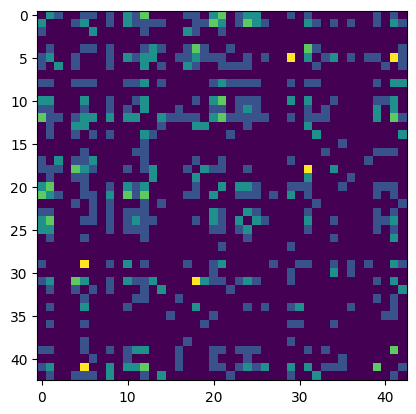

In [55]:
plt.imshow(commonWords.apply(lambda x: x.apply(len)))

In [56]:
commonWords.apply(lambda x: x.apply(len)).describe()

ALIAS,ramranch,Caterpillar Fungus,tjsol,Rookie9,matcha,Flower,kapybara,Bebocchia,stellarise,Kakka,...,Sam Vimes,Frieren,DiscoTechLola,Aaron,GGer,Reisen,DrPavel,SannyKuro,Mintchoco,Ty29
count,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.0,43.000000,43.0,...,43.000000,43.000000,43.000000,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.651163,0.813953,0.186047,0.0,0.441860,0.883721,0.418605,0.0,0.581395,0.0,...,0.139535,0.302326,0.093023,0.139535,0.0,0.069767,0.465116,0.139535,0.837209,0.325581
std,0.869694,0.879822,0.500277,0.0,0.765392,1.004971,0.626120,0.0,0.663058,0.0,...,0.350605,0.599002,0.293903,0.350605,0.0,0.257770,0.701998,0.350605,1.044948,0.606352
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.500000,0.500000
max,3.000000,3.000000,2.000000,0.0,3.000000,4.000000,2.000000,0.0,2.000000,0.0,...,1.000000,2.000000,1.000000,1.000000,0.0,1.000000,3.000000,1.000000,4.000000,2.000000


In [57]:
commonWords.sample(n=20).sample(n=20, axis=1)

ALIAS,kattmat,"Bond, Jan Bond",Weissach,Flower,tjsol,Reisen,w,Kanelbulle,Windy65,Ty29,Croco,GGer,Rookie9,Mintchoco,Beowulf,DiscoTechLola,cyan,John Wick,Aaron,sackboy
ALIAS,,,,,,,,,,,,,,,,,,,,
blackcat,{},{},{},{},{},{},{},{},{},{sport},{sport},{},{},{},{},{},{},{},{},{}
kapybara,{},{},{},{},"{development, web}",{},{},{},{},{sport},{sport},{},{},{},{},{},{},{},{},{development}
"Bond, Jan Bond",{},{},{},"{paint, technology, art, movie}",{},{paint},{},{art},{},{technology},{},{},{},"{technology, movie}","{art, movie}",{},{},{movie},{music},"{art, 3d}"
Rookie9,{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
Sam Vimes,{read},{},{},{read},{},{},{},{},{},{},{},{},{},{read},{},{},{},{},{},{}
Reisen,{},{paint},{},{paint},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
Aaron,{},{music},{},{book},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}
gallopinto,{},{},"{machine, learn}","{hike, learn}",{development},{},{},{since},{},{},{},{},{},{},{cook},{},{},"{science, machine, learn, data}",{},{development}
Flower,{read},"{paint, technology, art, movie}","{learn, watch}",{},{},{paint},{},{art},{},{technology},{},{},{},"{travel, technology, read, movie}","{art, movie}",{},{travel},"{learn, movie}",{book},{art}


In [58]:
commonWords.apply(lambda x: x.apply(lambda y: list(y) if y != set() else "")).to_csv("../data/commonWords.csv")
commonWords.apply(lambda x: x.apply(len)).unstack().rename_axis(["Alias1", "Alias2"]).rename("commonWordsCount").to_csv("../data/commonWordsCount.csv")